
	2-sample test for equality of proportions with continuity correction

data:  deaths_both_groups out of n_trials
X-squared = 51.665, df = 1, p-value = 6.581e-13
alternative hypothesis: two.sided
95 percent confidence interval:
 0.0629450 0.1115653
sample estimates:
   prop 1    prop 2 
0.4804805 0.3932253 

[1] "There was a significant difference in the proportion of deaths for each group."


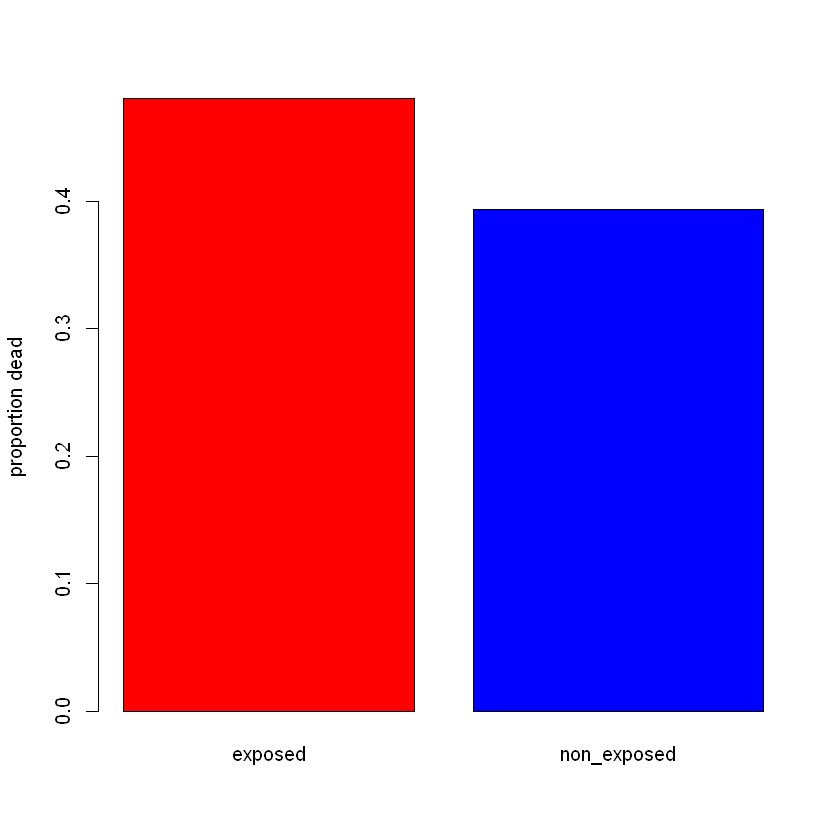

In [1]:
# randomly assigning a probability of death given exposure/nonexposure for a simulated population

exposure_death_prob = sample(seq(0.4, 0.8, 0.1), 1)

non_exposure_death_prob = sample(seq(0.1, 0.8, 0.1), 1)

# probabilistically assigning sample sizes for the exposed and nonexposed groups

samp_size_exposed = sample(seq(1000, 2000))

samp_size_nonexposed = sample(seq(5000, 10000))

# probabilistically generating the groups
exposed = sample(c('dead', 'alive'), samp_size_exposed, replace = TRUE, 
                 prob = c(exposure_death_prob, 1 - exposure_death_prob))

non_exposed = sample(c('dead', 'alive'), samp_size_nonexposed, replace = TRUE, 
                     prob = c(non_exposure_death_prob ,1-non_exposure_death_prob ))

# calculating the proportion deaths in each group
prop_dead_exposed = length(subset(exposed, exposed == 'dead'))/length(exposed)

prop_dead_non_exposed = length(subset(non_exposed, non_exposed == 'dead'))/length(non_exposed)

# creating a plot of the proportions
barplot(names.arg =  c('exposed', 'non_exposed'), 
        height = c(prop_dead_exposed, prop_dead_non_exposed),
       col = c('red', 'blue'),
       ylab = 'proportion dead')

# testing for a difference in the proportions

deaths_both_groups = c(length(subset(exposed, exposed == 'dead')), length(subset(non_exposed, non_exposed == 'dead')))

n_trials = c(length(exposed), length(non_exposed))

res = prop.test(x = deaths_both_groups, n = n_trials)
print(res)

if(res$p.value <= 0.05){print('There was a significant difference in the proportion of deaths for each group.')
                       }else{print('There was a NOT a significant difference in the proportion of deaths for each group.')}